## Create pandas dataframes and plot procesed data

<Figure size 720x720 with 0 Axes>

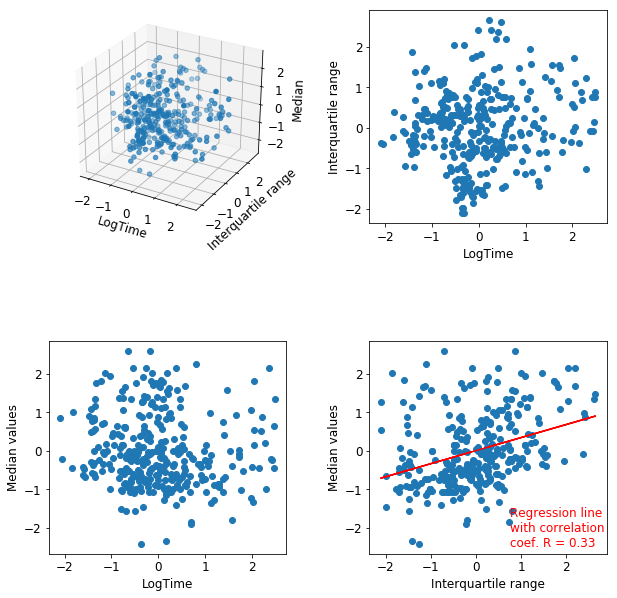

In [2]:
import json
import numpy as np
import pandas as pd
from cluster_analysis import ClusterAnalysis
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
matplotlib.rcParams.update({'font.size': 12})
file = "result_processed.json"
all_results = json.load(open(file))
medians = all_results["Median"]
IQR = all_results["IQR"]
TIME = all_results["Time"]
CI = all_results["CI"]
names = np.asarray([_.split(" ")[0] for _ in medians])
colors = np.asarray([ClusterAnalysis.COLORS[_] for _ in names])
medians_ = {}
IQR_ = {}
TIME_ = {}
CI_ = {}
split = lambda x:x.split(" ")[-1]
for item in np.unique(names):
    medians_[item] = dict.fromkeys(np.unique(list(map(split, medians.keys()))))
    IQR_[item] = dict.fromkeys(np.unique(list(map(split, medians.keys()))))
    TIME_[item] = dict.fromkeys(np.unique(list(map(split, medians.keys()))))
    CI_[item] = dict.fromkeys(np.unique(list(map(split, medians.keys()))))


for item in medians:
    method, dataset = item.split(" ")
    medians_[method][dataset] = medians[item]
    IQR_[method][dataset] = IQR[item]
    TIME_[method][dataset] = TIME[item]
    if CI[item]:
        CI_[method][dataset] = np.abs(CI[item][0] - CI[item][1])
    else:
        CI_[method][dataset] = None
df_median = pd.DataFrame(medians_).T
df_median = (df_median - df_median.mean())/df_median.std()
median_values = np.ravel(df_median)
df_iqr = pd.DataFrame(IQR_).T
df_iqr = (df_iqr - df_iqr.mean())/df_iqr.std()
iqr_values = np.ravel(df_iqr)
df_all_time = pd.DataFrame(TIME_).T
df_time = pd.DataFrame(TIME_).T
df_time = df_time + 1
df_time = df_time.apply(np.log10)
df_time = (df_time - df_time.mean())/df_time.std()
time_values = np.ravel(df_time)
names = np.ravel([[_]*40 for _ in df_median.index])
mask = ~np.isnan(median_values)
names = names[mask]
colors = np.asarray([ClusterAnalysis.COLORS[_] for _ in names])
median_values = median_values[mask]
iqr_values = iqr_values[mask]
time_values = time_values[mask]
clusters = ClusterAnalysis(median_values, iqr_values, time_values, 
                           names, colors, method="complete")
clusters.plot_data()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=0.35, hspace=0.55)
plt.savefig("figures/data.svg")
plt.show()

## Plot data colored by belonging method

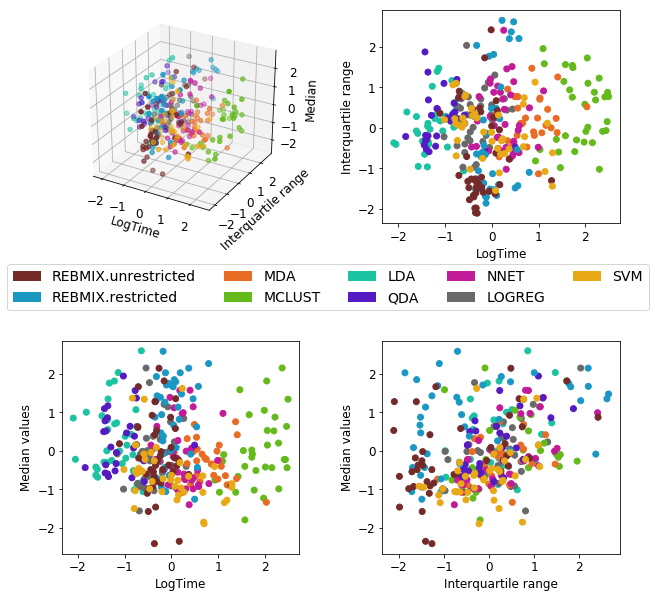

In [2]:
clusters.plot_data_colored()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=0.35, hspace=0.55)
legend_elements = [Patch(facecolor=color,
                         label=str(cluster) )  for cluster, color in clusters.COLORS.items()]
for legend_elem in legend_elements:
    if legend_elem.get_label() == "REBMVNORM":
        legend_elem.set_label("REBMIX.unrestricted")
    elif legend_elem.get_label() == "REBMIX":
        legend_elem.set_label("REBMIX.restricted")
plt.legend(handles=legend_elements, bbox_to_anchor=(1.15, 1.25), loc='right', prop={'size': 14},  ncol=5)
plt.savefig("figures/data_colored.svg")
plt.show()

## Plot resulting clustering dendrogram

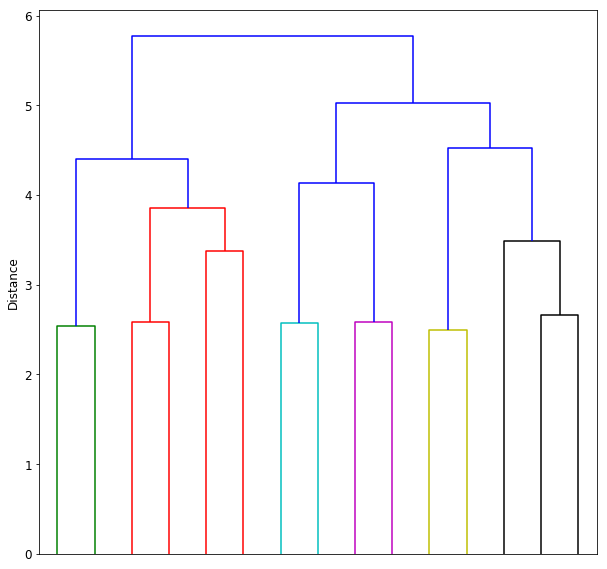

In [3]:
clusters.plot_dendogram(p=15)
plt.savefig("figures/dendogram.svg" )
plt.show()

## Plot resulting 3 clusters

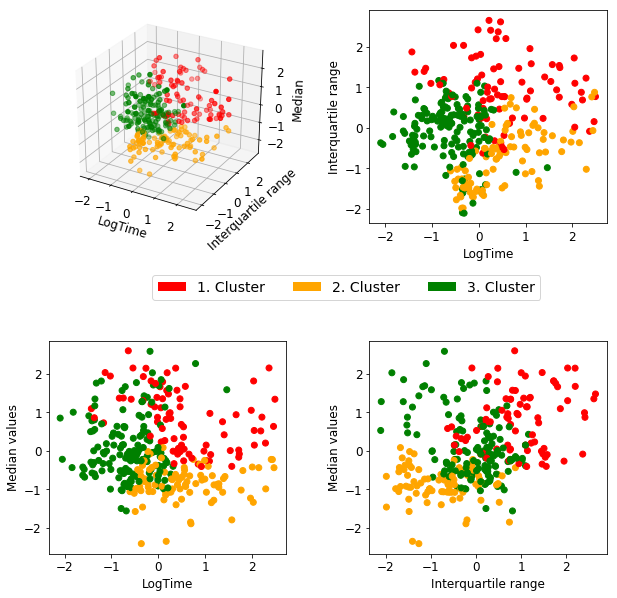

In [4]:
colors = {1:"#e6194b",
         2: "#3cb44b",
         3: "#ffe119",
         4: "#0082c8",
         5: "#008080",
         6: "#ffd8b1",
         7: "#e6beff"}
#colors = {1:"#e6194b",
#         2: "#3cb44b",
#         3: "#ffe119",
#         4: "#0082c8",
#         5: "#008080"}
colors = {1:"red",
         2: "orange",
         3: "green"}

legend_elements = [Patch(facecolor=color,
                         label=str(cluster) + ". Cluster") for cluster, color in colors.items()]
clusters.plot_clusters(recluster = {"t" : 3, "criterion" : "maxclust"}, colors = colors)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=0.35, hspace=0.55)
plt.legend(handles=legend_elements, bbox_to_anchor=(0.75, 1.25), loc='right', prop={'size': 14},  ncol=5)
plt.savefig("figures/clusters_3.svg")
plt.show()

## Plot resulting 7 clusters

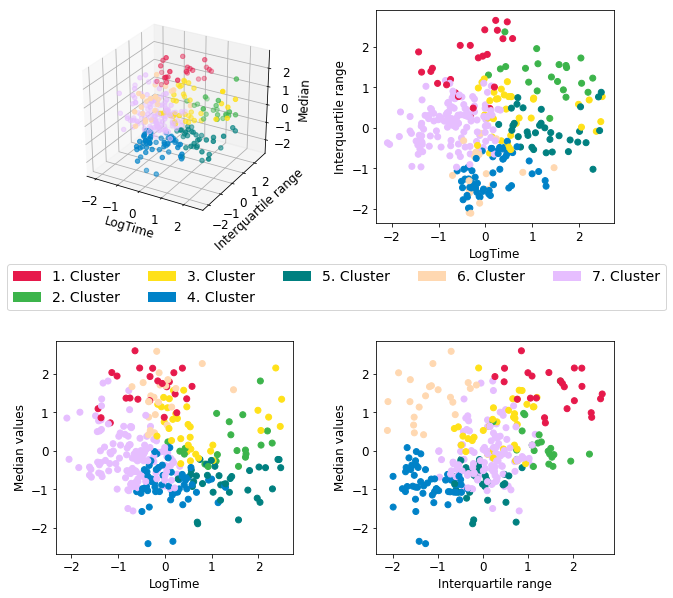

In [5]:
colors = {1:"#e6194b",
         2: "#3cb44b",
         3: "#ffe119",
         4: "#0082c8",
         5: "#008080",
         6: "#ffd8b1",
         7: "#e6beff"}
#colors = {1:"#e6194b",
#         2: "#3cb44b",
#         3: "#ffe119",
#         4: "#0082c8",
#         5: "#008080"}
#colors = {1:"red",
#         2: "orange",
#         3: "green"}

legend_elements = [Patch(facecolor=color,
                         label=str(cluster) + ". Cluster") for cluster, color in colors.items()]
clusters.plot_clusters(recluster = {"t" : 7, "criterion" : "maxclust"}, colors = colors)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=0.35, hspace=0.55)
plt.legend(handles=legend_elements, bbox_to_anchor=(1.25, 1.25), loc='right', prop={'size': 14},  ncol=5)
plt.savefig("figures/clusters_7.svg")
plt.show()

## Probability plots for 3 clusters

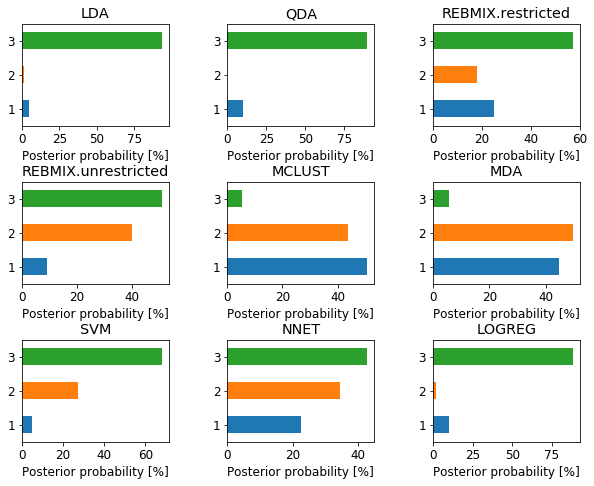

In [6]:
clusters.recluster(t=3, criterion="maxclust")
result = pd.DataFrame(clusters.posterior_algorithms())*100
fig = plt.figure(figsize=(10, 13.5))
#fig.suptitle("Posterior probabilities of methods belong to clusters", fontsize=16)
ax = fig.add_subplot(531)
ax = result["LDA"].plot(kind = "barh", ax=ax, title = "LDA")
ax.set_xlabel("Posterior probability [%]")
ax = fig.add_subplot(532)
ax = result["QDA"].plot(kind = "barh", ax=ax, title = "QDA")
ax.set_xlabel("Posterior probability [%]")
ax = fig.add_subplot(533)
ax = result["REBMIX"].plot(kind = "barh", ax=ax, title = "REBMIX.restricted")
ax.set_xlabel("Posterior probability [%]")
ax = fig.add_subplot(534)
ax = result["REBMVNORM"].plot(kind = "barh", ax=ax, title = "REBMIX.unrestricted")
ax.set_xlabel("Posterior probability [%]")
ax = fig.add_subplot(535)
ax = result["MCLUST"].plot(kind = "barh", ax=ax, title = "MCLUST")
ax.set_xlabel("Posterior probability [%]")
ax = fig.add_subplot(536)
ax= result["MDA"].plot(kind = "barh", ax=ax, title = "MDA")
ax.set_xlabel("Posterior probability [%]")
ax = fig.add_subplot(537)
ax = result["SVM"].plot(kind = "barh", ax=ax, title = "SVM")
ax.set_xlabel("Posterior probability [%]")
ax = fig.add_subplot(538)
ax.set_xlabel("Posterior probability [%]")
ax = result["NNET"].plot(kind = "barh", ax=ax, title = "NNET")
ax.set_xlabel("Posterior probability [%]")
ax = fig.add_subplot(539)
ax.set_xlabel("Posterior probability [%]")
ax = result["LOGREG"].plot(kind = "barh", ax=ax, title = "LOGREG")
ax.set_xlabel("Posterior probability [%]")
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=0.4, hspace=0.55)
plt.savefig("figures/results_clusters_3.svg")
plt.show()

## Probabilty plots for 7 clusters 

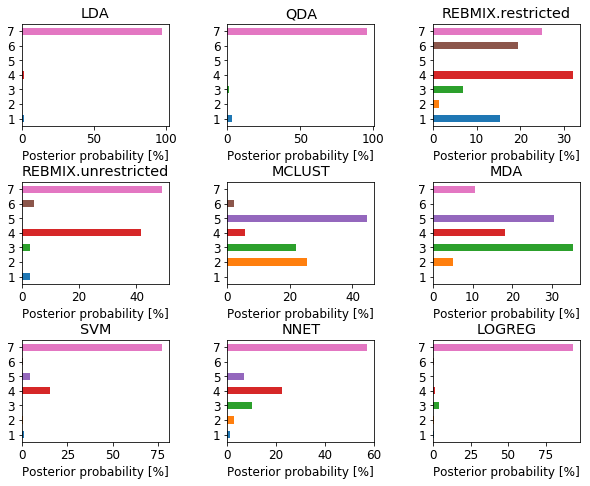

In [7]:
clusters.recluster(t=7, criterion="maxclust")
result = pd.DataFrame(clusters.posterior_algorithms())*100
fig = plt.figure(figsize=(10, 13.5))
#fig.suptitle("Posterior probabilities of methods belong to clusters", fontsize=16)
ax = fig.add_subplot(531)
ax = result["LDA"].plot(kind = "barh", ax=ax, title = "LDA")
ax.set_xlabel("Posterior probability [%]")
ax = fig.add_subplot(532)
ax = result["QDA"].plot(kind = "barh", ax=ax, title = "QDA")
ax.set_xlabel("Posterior probability [%]")
ax = fig.add_subplot(533)
ax = result["REBMIX"].plot(kind = "barh", ax=ax, title = "REBMIX.restricted")
ax.set_xlabel("Posterior probability [%]")
ax = fig.add_subplot(534)
ax = result["REBMVNORM"].plot(kind = "barh", ax=ax, title = "REBMIX.unrestricted")
ax.set_xlabel("Posterior probability [%]")
ax = fig.add_subplot(535)
ax = result["MCLUST"].plot(kind = "barh", ax=ax, title = "MCLUST")
ax.set_xlabel("Posterior probability [%]")
ax = fig.add_subplot(536)
ax= result["MDA"].plot(kind = "barh", ax=ax, title = "MDA")
ax.set_xlabel("Posterior probability [%]")
ax = fig.add_subplot(537)
ax = result["SVM"].plot(kind = "barh", ax=ax, title = "SVM")
ax.set_xlabel("Posterior probability [%]")
ax = fig.add_subplot(538)
ax.set_xlabel("Posterior probability [%]")
ax = result["NNET"].plot(kind = "barh", ax=ax, title = "NNET")
ax.set_xlabel("Posterior probability [%]")
ax = fig.add_subplot(539)
ax.set_xlabel("Posterior probability [%]")
ax = result["LOGREG"].plot(kind = "barh", ax=ax, title = "LOGREG")
ax.set_xlabel("Posterior probability [%]")
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=0.4, hspace=0.55)
plt.savefig("figures/results_clusters_3.svg")
plt.show()

## Median values of classification error for all methods on all datasets

In [10]:
df_median.T

,LDA,LOGREG,MCLUST,MDA,NNET,QDA,REBMIX,REBMVNORM,SVM
Abalone,-0.427585,-0.919428,NaN,0.409733,-0.932039,NaN,0.867563,1.658639,-0.656883
Bankotes,1.061896,0.029921,-0.994541,NaN,-0.994541,0.373913,1.656815,-0.138920,-0.994541
Diabetes,-1.019532,-0.933354,2.144810,0.039515,0.957094,0.067672,-0.439497,-0.550418,-0.266288
DiabetesPic,-0.638312,-1.000422,-0.000050,-0.351182,-0.754375,NaN,1.785942,1.269911,-0.311513
Digits,0.996201,0.224640,-0.672979,-0.739524,-0.610177,NaN,1.921629,-0.195626,-0.924163
DrugConsumption,-0.337148,-0.578619,0.194817,0.678123,0.001276,1.934865,0.460526,-1.581679,-0.772160
Ecoli,NaN,-0.119865,1.046012,NaN,1.380967,NaN,-0.734935,-1.108904,-0.463275
EegEye,-0.005975,-0.021096,-1.799571,-1.070767,0.260855,1.087778,0.616414,1.346123,-0.413761
Frogs,0.719720,0.291007,-0.426877,NaN,-0.735962,-0.337134,2.020968,-0.377020,-1.154703
Glass,0.371414,0.371414,NaN,-1.342725,-0.015896,NaN,1.683865,-0.026518,-1.041555


## Interquartile range of classification error for all methods on all datasets

In [13]:
df_iqr.T

,LDA,LOGREG,MCLUST,MDA,NNET,QDA,REBMIX,REBMVNORM,SVM
Abalone,0.271705,0.561007,NaN,1.248480,0.046596,NaN,-1.522663,-1.182614,0.577489
Bankotes,0.503274,0.006002,-1.029961,NaN,-1.029961,0.384991,1.806906,0.388709,-1.029961
Diabetes,0.623328,0.477982,-0.092905,0.761873,0.703616,0.601297,-1.699995,-1.712711,0.337515
DiabetesPic,-0.084810,-0.227816,1.138141,1.463699,-0.491711,NaN,0.472593,-1.615326,-0.654771
Digits,0.384631,1.297736,-0.603714,-1.142426,0.449929,NaN,0.268834,0.899110,-1.554100
DrugConsumption,-0.082978,-0.344616,1.221032,0.764149,0.047349,1.090950,-1.518544,-1.485347,0.308004
Ecoli,NaN,0.567129,0.574074,NaN,1.201144,NaN,-1.067824,-1.327770,0.053248
EegEye,-0.971544,-0.978176,-0.202230,-0.722650,-0.234367,1.867759,-0.543433,0.663291,1.121351
Frogs,1.386960,0.532446,-0.094197,NaN,0.076705,-0.207805,1.000400,-1.575191,-1.119319
Glass,0.278641,0.278742,NaN,0.512789,1.448975,NaN,-1.139933,-1.474342,0.095129


## Computation time for all methods on all datasets

In [3]:
df_all_time.T

,LDA,LOGREG,MCLUST,MDA,NNET,QDA,REBMIX,REBMVNORM,SVM
Abalone,0.48,36.22,NaN,630.03,120.22,NaN,17.65,8.12,143.30
Bankotes,0.20,0.91,64.75,NaN,3.83,0.15,2.40,1.37,0.76
Diabetes,0.25,0.55,318.36,12.25,6.54,0.22,2.95,1.56,1.65
DiabetesPic,0.36,1.61,42.85,19.62,10.21,NaN,7.92,4.52,8.87
Digits,1.59,154.37,3022.20,1183.25,240.61,NaN,66.62,28.70,159.51
DrugConsumption,0.40,10.68,5443.89,62.67,20.30,0.49,9.82,4.56,25.56
Ecoli,NaN,0.96,176.39,NaN,3.37,NaN,1.71,0.79,0.28
EegEye,2.06,22.54,8499.46,188.18,180.67,1.67,529.69,158.60,1481.42
Frogs,1.11,19.32,4877.66,NaN,71.30,1.05,56.88,30.71,52.45
Glass,0.20,1.04,NaN,16.48,2.82,NaN,1.92,1.37,0.45
